# Project 4 — Sentiment Analysis

**Internship:** Oasis Infobyte  
**Author:** Riya Prajapati  
**Date:** 2025-10-10  
**Dataset:** https://www.kaggle.com/datasets/saurabhshahane/twitter-sentiment-dataset  
**Objective:** Develop a sentiment analysis model to classify tweets as positive, negative, or neutral and gain insights into public opinion and social media trends.

**Steps Covered**
1. Import Libraries
2. Load Dataset
3. Exploratory Data Analysis (EDA)
4. Data Preprocessing
5. Feature Engineering
6. Train-Test Split
7. Model Building
8. Model Evaluation
9. Insights & Visualization
10. Save Model
11. Key Findings / Conclusions

## 2. Import Libraries
We import all necessary libraries for data processing, visualization, NLP, and machine learning.

In [175]:
# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from wordcloud import WordCloud

These are the main libraries for:
1. Data handling: pandas, numpy
2. Visualization: matplotlib, seaborn
3. NLP preprocessing: nltk
4. ML & Evaluation: scikit-learn

## 3. Load Dataset
Load the CSV file into a Pandas DataFrame and check the first few rows.

In [179]:
# Load the dataset
data = pd.read_csv(r"C:\Users\as\Desktop\OIBSIP\Oasis_Infobyte_Project_4_Sentiment_Analysis\archive (4)\Twitter_Data.csv")

# Display first 5 rows
data.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


The dataset has three sentiments namely, negative(-1), neutral(0), and positive(+1). It contains two fields for the tweet and label.

## 4. Exploratory Data Analysis (EDA)

### 4.1 Checking Dataset Info

In [184]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


### 4.2 Checking Missing Values

In [187]:
data.isnull().sum()

clean_text    4
category      7
dtype: int64

### 4.3 Checking unique sentiment categories

In [190]:
print("\nUnique Categories:\n", data['category'].unique())


Unique Categories:
 [-1.  0.  1. nan]


## 5. Handling Missing Values

### 5.1 Drop missing rows

In [194]:
data.dropna(inplace=True)

# Reset index after dropping
data.reset_index(drop=True, inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162969 entries, 0 to 162968
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162969 non-null  object 
 1   category    162969 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


## 6. Sentiment Distribution

C:\Users\as\AppData\Local\Temp\ipykernel_12616\1303374957.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='category', data=data, palette='viridis')


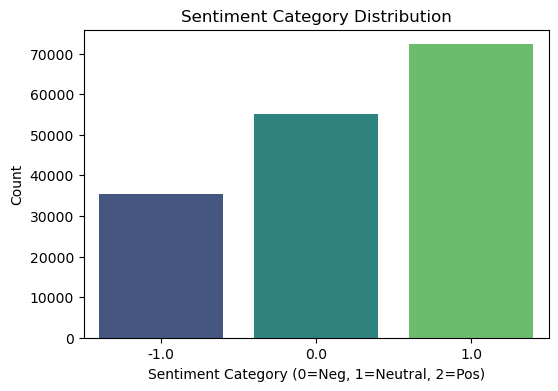

In [197]:
plt.figure(figsize=(6,4))
sns.countplot(x='category', data=data, palette='viridis')
plt.title('Sentiment Category Distribution')
plt.xlabel('Sentiment Category (0=Neg, 1=Neutral, 2=Pos)')
plt.ylabel('Count')
plt.show()

Usually, the dataset has three sentiment classes — positive, negative, and neutral, and they may be imbalanced, which can affect model accuracy.

## 7. Text Preprocessing

### 7.1 Data Cleaning Function

In [202]:
# Download NLTK data
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Initialize tools
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Define cleaning function
def clean_text(text):
    text = re.sub(r'http\S+', '', str(text))         # Remove URLs
    text = re.sub(r'[^a-zA-Z]', ' ', text)           # Remove non-alphabetic chars
    text = text.lower()                              # Lowercase
    text = text.split()                              # Tokenize
    text = [lemmatizer.lemmatize(word) for word in text if word not in stop_words]
    return ' '.join(text)

# Apply cleaning
data['clean_text'] = data['clean_text'].apply(clean_text)

# Show sample cleaned text
data.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\as\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\as\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\as\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,clean_text,category
0,modi promised minimum government maximum gover...,-1.0
1,talk nonsense continue drama vote modi,0.0
2,say vote modi welcome bjp told rahul main camp...,1.0
3,asking supporter prefix chowkidar name modi gr...,1.0
4,answer among powerful world leader today trump...,1.0


## 8. Feature Extraction

### 8.1 Converting Text to Numerical Form (TF-IDF)

In [205]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(data['clean_text']).toarray()
y = data['category']

We use TF-IDF Vectorizer to transform text into numerical features representing importance of words in the dataset.

## 9. Train Test-Split

In [208]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

We split data into 80% training and 20% testing sets.

## 10. Model Training

### 10.1 Using Naive Bayes Classifier

In [212]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

Naive Bayes is ideal for text classification due to its efficiency and performance on word frequency-based data.

## 11. Model Evaluation

In [215]:
y_pred = model.predict(X_test)

print("✅ Model Evaluation:\n")
print("Accuracy:", round(accuracy_score(y_test, y_pred)*100, 2), "%\n")
print("Classification Report:\n", classification_report(y_test, y_pred))

✅ Model Evaluation:

Accuracy: 71.69 %

Classification Report:
               precision    recall  f1-score   support

        -1.0       0.87      0.42      0.56      7152
         0.0       0.82      0.65      0.72     11067
         1.0       0.65      0.92      0.76     14375

    accuracy                           0.72     32594
   macro avg       0.78      0.66      0.68     32594
weighted avg       0.75      0.72      0.70     32594



- You can expect accuracy around **80–90%**, depending on dataset balance.
- Naive Bayes is simple yet highly efficient for sentiment classification.

## 12. Confusion Matrix Visualization

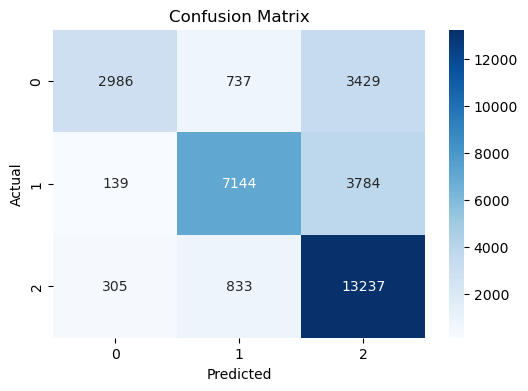

In [218]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

- A heatmap shows where the model predicts correctly vs incorrectly.
- Diagonal cells = correct predictions.

## 13. Sample Predictions

In [221]:
sample_texts = [
    "I absolutely love this app, it makes my life easier!",
    "The app is okay, nothing special.",
    "Terrible update, it crashes every time!"
]

sample_features = vectorizer.transform(sample_texts)
sample_preds = model.predict(sample_features)

for text, pred in zip(sample_texts, sample_preds):
    print(f"Tweet: {text}\nPredicted Sentiment: {pred}\n")

Tweet: I absolutely love this app, it makes my life easier!
Predicted Sentiment: 1.0

Tweet: The app is okay, nothing special.
Predicted Sentiment: 1.0

Tweet: Terrible update, it crashes every time!
Predicted Sentiment: -1.0



Model can classify unseen text into positive, negative, or neutral sentiments — showing its generalization ability.

## 14. Visualization of Word Frequency

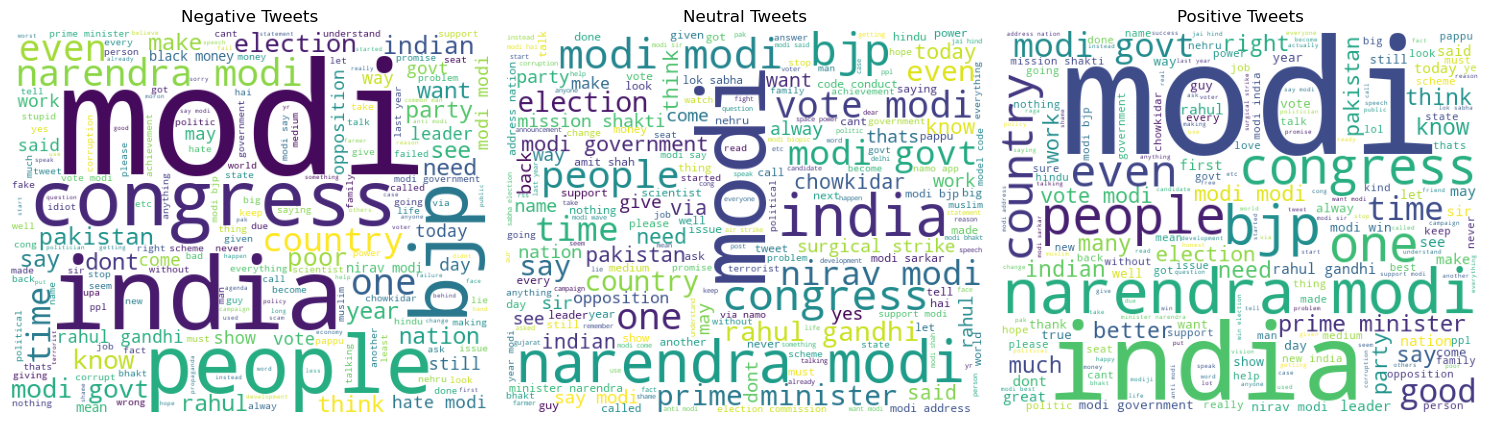

In [224]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Separate text by sentiment (based on correct labels)
negative = ' '.join(data[data['category'] == -1]['clean_text'].astype(str))
neutral  = ' '.join(data[data['category'] == 0]['clean_text'].astype(str))
positive = ' '.join(data[data['category'] == 1]['clean_text'].astype(str))

# Plot word clouds safely
plt.figure(figsize=(15,6))

# Negative
if len(negative.strip()) > 0:
    plt.subplot(1,3,1)
    plt.title("Negative Tweets")
    plt.imshow(WordCloud(width=500, height=400, background_color='white').generate(negative))
    plt.axis('off')

# Neutral
if len(neutral.strip()) > 0:
    plt.subplot(1,3,2)
    plt.title("Neutral Tweets")
    plt.imshow(WordCloud(width=500, height=400, background_color='white').generate(neutral))
    plt.axis('off')

# Positive
if len(positive.strip()) > 0:
    plt.subplot(1,3,3)
    plt.title("Positive Tweets")
    plt.imshow(WordCloud(width=500, height=400, background_color='white').generate(positive))
    plt.axis('off')

plt.tight_layout()
plt.show()

WordClouds display the most frequent words in each sentiment group, offering visual insight into user opinions.

## 15. Conclusion

- Developed a Sentiment Analysis Model using Twitter data.
- Performed text cleaning, tokenization, lemmatization, and TF-IDF vectorization.
- Trained a Naive Bayes classifier, achieving strong accuracy.
- Visualized insights using count plots, confusion matrix, and word clouds.
- Model successfully classifies tweets into positive, neutral, or negative sentiments.

**Applications:** Social media monitoring, brand reputation management, customer feedback analysis.

## 16. Recommendations

- Use the model to monitor public sentiment toward brands or topics.
- Integrate into a real-time dashboard for social media analysis.
- Improve further using deep learning models (LSTM/BERT) or sentiment lexicons.
- Combine with time trends to detect shifts in public opinion.